In [1]:
# 상위 폴더 경로 가져오기.
from example_base import GetParentPath
# 핑퐁 로봇 제어 모듈 import.
from pingpongthread import PingPongThread

In [2]:
# 2개 로봇을 연결하는 인스턴스 생성.
PingPongThreadInstance = PingPongThread(number=2, group_id=4)
# 로봇 제어 쓰레드 시작.
PingPongThreadInstance.start()
# 모든 로봇이 연결될 때 까지 기다림.
PingPongThreadInstance.wait_until_full_connect()

Found device: nRF Connect USB CDC ACM(COM12)
Serial connected.Write data:
 FF FF 04 FF 20 00 AD 00 0B 1A 04
Connected with a master robot.
Connected robots: 2
Fully connected.


In [3]:
# '강원도 특산물' 사진 클래스 인스턴스, '충청남도 특산물' 사진 클래스 인스턴스 생성.
gangwondo = PingPongThreadInstance.ImageClass("gangwondo", "chapter8/gangwondo")
chungcheongnamdo = PingPongThreadInstance.ImageClass("chungcheongnamdo", "chapter8/chungcheongnamdo")

In [4]:
# 모델 학습. 
# 첫 번째 인수는 저장하는 이름, 두 번째 인수는 knn 알고리즘의 k 값, 세 번째 인수는 모델 모드. 네 번째 인수 이후는 클래스 인스턴스들.
model = PingPongThreadInstance.train_classes("chapter8/specialties_model.json", 1, 2, gangwondo, chungcheongnamdo)

Class gangwondo : 16 images.
Class chungcheongnamdo : 16 images.
Training done.
chapter8/specialties_model.json saved.


In [5]:
# 시간 제어를 위한 모듈 import.
import time
# 키보드 제어를 위한 모듈 import.
import keyboard

# 대사 출력.
print("어느 지역의 특산품이지???")
time.sleep(1)
# '스페이스 바' 키를 누르면 진행.
while True:
    if keyboard.is_pressed(" "):
        break
    else:
        time.sleep(0.01)

어느 지역의 특산품이지???


In [6]:
# 'scene2' 함수 정의.
def scene2():
    # 대사 읽어주기.
    PingPongThreadInstance.tts_ko("강원도 특산품입니다.", True)
    # 20도만큼 1번 큐브를 반시계방향으로 회전. 이후 1초 쉬기.
    angle = 20/360
    PingPongThreadInstance.run_motor_step(1, 15, -angle)
    time.sleep(angle/15*60+1)
    # 120도만큼 2번 큐브를 반시계방향으로 회전. 이후 1초 쉬기.
    angle = 120/360
    PingPongThreadInstance.run_motor_step(2, 15, -angle)
    time.sleep(angle/15*60+1)
    # 120도만큼 2번 큐브를 시계방향으로 회전. 이후 1초 쉬기.
    angle = 120/360
    PingPongThreadInstance.run_motor_step(2, 15, angle)
    time.sleep(angle/15*60+1)
    # 20도만큼 1번 큐브를 시계방향으로 회전.
    angle = 20/360
    PingPongThreadInstance.run_motor_step(1, 15, angle)
    time.sleep(angle/15*60)

In [7]:
# 'scene3' 함수 정의.
def scene3():
    # 대사 읽어주기.
    PingPongThreadInstance.tts_ko("충청남도 특산품입니다.", True)
    # 15도만큼 1번 큐브를 시계방향으로 회전. 이후 1초 쉬기.
    angle = 15/360
    PingPongThreadInstance.run_motor_step(1, 15, angle)
    time.sleep(angle/15*60+1)
    # 120도만큼 2번 큐브를 반시계방향으로 회전. 이후 1초 쉬기.
    angle = 120/360
    PingPongThreadInstance.run_motor_step(2, 15, -angle)
    time.sleep(angle/15*60+2)
    # 120도만큼 2번 큐브를 시계방향으로 회전. 이후 1초 쉬기.
    angle = 120/360
    PingPongThreadInstance.run_motor_step(2, 15, angle)
    time.sleep(angle/15*60+1)
    # 15도만큼 1번 큐브를 반시계방향으로 회전. 이후 1초 쉬기.
    angle = 15/360
    PingPongThreadInstance.run_motor_step(1, 15, -angle)
    time.sleep(angle/15*60)

In [8]:
# 대사 출력.
time.sleep(2)
print("내가 알려주지~")
time.sleep(1)
print("사진을 인식시켜 주면")
time.sleep(1)
print("해당 특산품 지역을 알려줄게")
time.sleep(1)

내가 알려주지~
사진을 인식시켜 주면
해당 특산품 지역을 알려줄게


In [9]:
# 웹캠 열기.
# PingPongThreadInstance.webcam_open(0)
PingPongThreadInstance.webcam_open("http://192.168.66.1:9527/videostream.cgi?loginuse=admin&loginpas=admin")

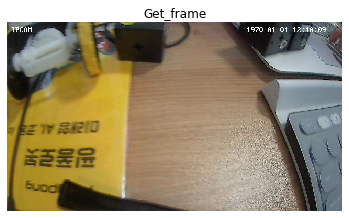

{'gangwondo': 0, 'chungcheongnamdo': 1}
accum_prediction: {'gangwondo': 0.06896551724137931, 'chungcheongnamdo': 0.9310344827586207}
충청남도 특산품입니다.
Write data: FF FF 04 AA 20 00 CD 00 20 02 01 00 00 FF FF 04 00 20 00 C1 00 13 02 01 00 02 03 84 00 00 00 53
Aggregator set.
Write data: FF FF 04 AA 20 00 CD 00 20 02 01 00 00 FF FF 04 01 20 00 C1 00 13 02 01 00 02 FC 7C 00 00 02 9B
Aggregator set.
Write data: FF FF 04 AA 20 00 CD 00 20 02 01 00 00 FF FF 04 01 20 00 C1 00 13 02 01 00 02 03 84 00 00 02 9B
Aggregator set.
Write data: FF FF 04 AA 20 00 CD 00 20 02 01 00 00 FF FF 04 00 20 00 C1 00 13 02 01 00 02 FC 7C 00 00 00 53
Aggregator set.


In [10]:
# 프레임을 평가하는 인스턴스 생성. 누적 프레임은 5초 동안 보관.
frames_predictor = PingPongThreadInstance.FramesPredictor(model=model, timer_sec=5)
# KNN 알고리즘의 k를 1로 설정.
frames_predictor.set_knn_k(1)
# 웹캠을 이용하여 특산물을 분류하는 루프.
while True:
    # 주피터 노트북 출력 비우기.
    PingPongThreadInstance.clear_output()
    # 현재 웹캠 프레임을 보여주고 가져오기.
    frame = PingPongThreadInstance.webcam_get_frame(window="Get_frame")
    # 현재 프레임을 평가하고, 평가 내용을 누적.
    frame_prediction = frames_predictor.image_predict_and_accum(frame)
    print(frame_prediction)
    # 누적된 평가 내용.
    accum_prediction = frames_predictor.accum_predict()
    # 누적된 평가 내용이 없으면 돌아가기. 아니면 가장 확률이 높은 클래스 확인.
    if accum_prediction == None:
        max_class = None
        continue
    else:
        print("accum_prediction:", accum_prediction)
        # 가장 확률이 높은 클래스.
        max_class = max(accum_prediction, key=accum_prediction.get)
    # '강원도 특산물'일 확률이 90% 이상일 때, scene2 함수를 실행.
    if max_class == "gangwondo" and accum_prediction[max_class] > 0.9:
        scene2()
        break
    # '충청남도 특산물'일 확률이 90% 이상일 때, scene3 함수를 실행.
    elif max_class == "chungcheongnamdo" and accum_prediction[max_class] > 0.9:
        scene3()
        break
    # 모두 아니면 돌아가기.
    else:
        continue

In [11]:
# 웹캠 닫기.
PingPongThreadInstance.webcam_close()
# 로봇 제어 쓰레드 종료.
PingPongThreadInstance.end()

Write data: FF FF FF FF 00 00 A8 00 0A 01
Disconnect master robot.
Serial disconnected. Sleep 3 seconds.
End thread.
